# 주요 함수 정의

## 현재가 조회

현재가 조회를 위해서 먼저 KIS Developers 홈페이지 > API 문서 >  국내주식시세 > 주식현재가 시세 (https://apiportal.koreainvestment.com/apiservice/apiservice-domestic-stock-quotations#L_07802512-4f49-4486-91b4-1050b6f5dc9d) 페이지에 접속 하겠습니다.

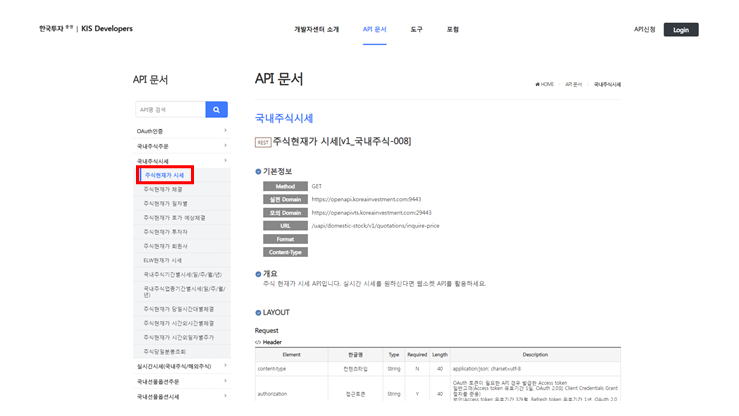

기본정보에서 GET 방식임을 확인 할 수 있고 LAYOUT 을 통해 Request 함수의 headers 및 params 파라미터의 인자 값들을 확인 할 수 있습니다.

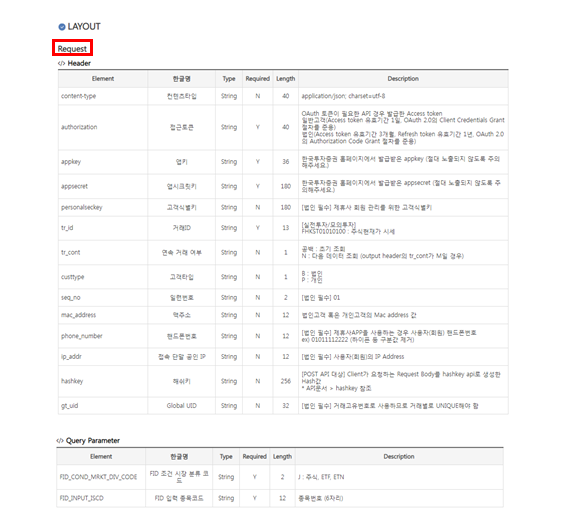

또한, 수신 받을 Response 객체의 형태도 미리 확인하여 원하는 데이터를 어떻게 추출할지도 알 수 있습니다.

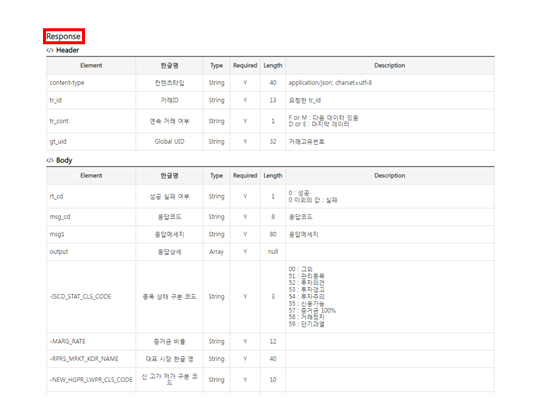

Request 와 Response 문서를 참고하여 특정 종목의 현재가를 조회 하는 코드는 아래와 같습니다. 

In [ ]:
def get_current_price(code="005930"):
    """현재가 조회"""
    PATH = "uapi/domestic-stock/v1/quotations/inquire-price" # <<<<<<<<<
    URL = f"{URL_BASE}/{PAH}"
    headers = {"Content-Type":"application/json", # <<<<<<<<<
            "authorization": f"Bearer {ACCESS_TOKEN}", 
            "appKey":APP_KEY,
            "appSecret":APP_SECRET,
            "tr_id":"FHKST01010100" # <<<<<<<<<
    }
    params = {
    "fid_cond_mrkt_div_code":"J", # <<<<<<<<<
    "fid_input_iscd":code, # <<<<<<<<<
    }
    res = requests.get(URL, headers=headers, params=params)
    return int(res.json()['output']['stck_prpr']) # <<<<<<<<<

## 잔고 조회

잔고 조회도 마찬가지로 KIS Developers 의 API 문서를 참고하겠습니다. KIS Developers 홈페이지 > API 문서 >  국내주식주문 > 주식잔고조회 (https://apiportal.koreainvestment.com/apiservice/apiservice-domestic-stock#L_66c61080-674f-4c91-a0cc-db5e64e9a5e6) 페이지에 접속 하겠습니다.

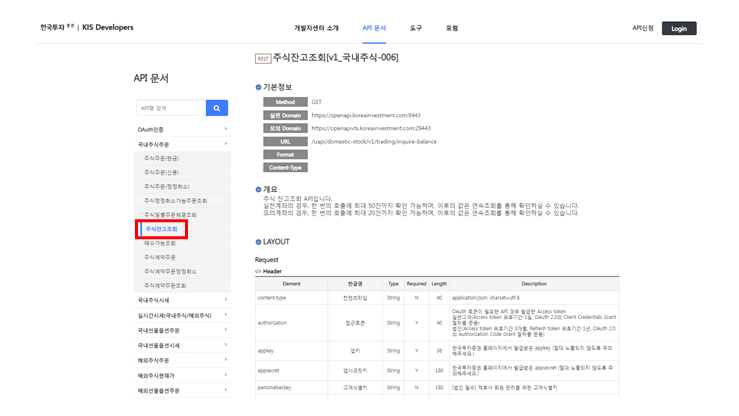

앞 절의 현재가 조회와 마찬가지로 LAYOUT의 Request 문서를 참고하여 headers 및 params 파라미터의 인자 값들을 확인 할 수 있습니다.
Response 문서를 통해 객체의 형태도 미리 확인하여 원하는 데이터를 어떻게 추출할지도 알 수 있습니다.

In [ ]:
def get_stock_balance():
    """주식 잔고조회"""
    PATH = "uapi/domestic-stock/v1/trading/inquire-balance" # <<<<<<<<<
    URL = f"{URL_BASE}/{PATH}"
    headers = {"Content-Type":"application/json", # <<<<<<<<<
        "authorization":f"Bearer {ACCESS_TOKEN}",
        "appKey":APP_KEY,
        "appSecret":APP_SECRET,
        "tr_id":"TTTC8434R", # <<<<<<<<<
        "custtype":"P", # <<<<<<<<<
    }
    params = {
        "CANO": CANO,
        "ACNT_PRDT_CD": ACNT_PRDT_CD,
        "AFHR_FLPR_YN": "N", # <<<<<<<<<
        "OFL_YN": "", # <<<<<<<<<
        "INQR_DVSN": "02", # <<<<<<<<<
        "UNPR_DVSN": "01", # <<<<<<<<<
        "FUND_STTL_ICLD_YN": "N", # <<<<<<<<<
        "FNCG_AMT_AUTO_RDPT_YN": "N", # <<<<<<<<<
        "PRCS_DVSN": "01", # <<<<<<<<<
        "CTX_AREA_FK100": "", # <<<<<<<<<
        "CTX_AREA_NK100": "" # <<<<<<<<<
    }
    res = requests.get(URL, headers=headers, params=params)
    stock_list = res.json()['output1'] # <<<<<<<<<
    evaluation = res.json()['output2'] # <<<<<<<<<
    stock_dict = {}
    send_message(f"====주식 보유잔고====")
    for stock in stock_list:
        if int(stock['hldg_qty']) > 0:
            stock_dict[stock['pdno']] = [stock['hldg_qty'], stock['EVLU_ERNG_RT']] # < 0: 보유 수량, 1: 평가수익율
            send_message(f"{stock['prdt_name']}({stock['pdno']}): {stock['hldg_qty']}주")
            time.sleep(0.1)
    send_message(f"주식 평가 금액: {evaluation[0]['scts_evlu_amt']}원") 
    time.sleep(0.1)
    send_message(f"평가 손익 합계: {evaluation[0]['evlu_pfls_smtl_amt']}원")
    time.sleep(0.1)
    send_message(f"총 평가 금액: {evaluation[0]['tot_evlu_amt']}원")
    time.sleep(0.1)
    send_message(f"=================")
    return stock_dict

## 잔여 현금 조회

잔여 현금 조회도 마찬가지로 KIS Developers 의 API 문서를 참고하겠습니다. KIS Developers 홈페이지 > API 문서 >  국내주식주문 > 매수가능조회 (https://apiportal.koreainvestment.com/apiservice/apiservice-domestic-stock#L_aade4c72-5fb7-418a-9ff2-254b4d5f0ceb) 페이지에 접속 하겠습니다.

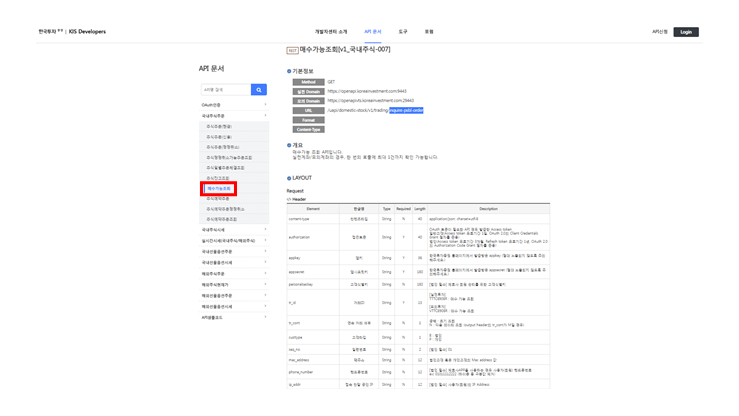

앞 절의 잔여 현금  조회와 마찬가지로 LAYOUT의 Request 문서를 참고하여 headers 및 params 파라미터의 인자 값들을 확인 할 수 있습니다.
Response 문서를 통해 객체의 형태도 미리 확인하여 원하는 데이터를 어떻게 추출할지도 알 수 있습니다.

In [ ]:
def get_balance():
    """현금 잔고조회"""
    PATH = "uapi/domestic-stock/v1/trading/inquire-psbl-order" # <<<<<<<<<
    URL = f"{URL_BASE}/{PATH}"
    headers = {"Content-Type":"application/json", # <<<<<<<<<
        "authorization":f"Bearer {ACCESS_TOKEN}",
        "appKey":APP_KEY,
        "appSecret":APP_SECRET,
        "tr_id":"TTTC8908R", # <<<<<<<<<
        "custtype":"P", # <<<<<<<<<
    }
    params = {
        "CANO": CANO,
        "ACNT_PRDT_CD": ACNT_PRDT_CD,
        "PDNO": "005930", # <<<<<<<<<
        "ORD_UNPR": "65500", # <<<<<<<<<
        "ORD_DVSN": "01", # <<<<<<<<<
        "CMA_EVLU_AMT_ICLD_YN": "Y", # <<<<<<<<<
        "OVRS_ICLD_YN": "Y" # <<<<<<<<<
    }
    res = requests.get(URL, headers=headers, params=params)
    cash = res.json()['output']['ord_psbl_cash'] # <<<<<<<<<
    send_message(f"주문 가능 현금 잔고: {cash}원") 
    return int(cash)

## 매수

매수 주문도 마찬가지로 KIS Developers 의 API 문서를 참고하겠습니다. KIS Developers 홈페이지 > API 문서 >  국내주식주문 > 주식주문(현금) (https://apiportal.koreainvestment.com/apiservice/apiservice-domestic-stock#L_aade4c72-5fb7-418a-9ff2-254b4d5f0ceb) 페이지에 접속 하겠습니다.

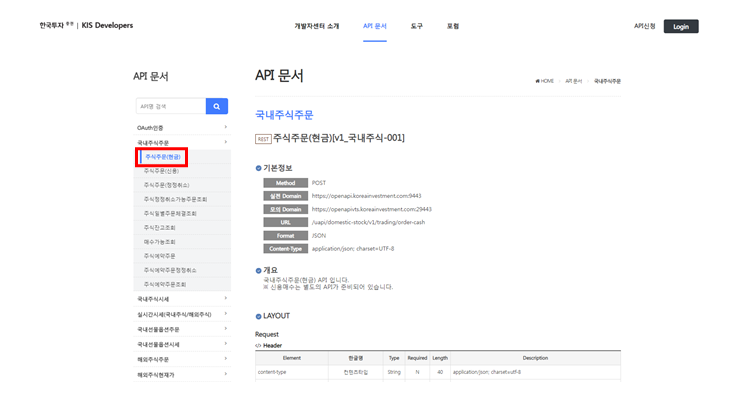

앞의 조회 요청들과 달리 주문 요청은 기본정보에서 POST 방식임을 확인 할 수 있고 보안을 위해서 headers 에 hashkey 값을 입력 해줍니다.

In [ ]:
def buy(code="005930", qty="1"):
    """주식 시장가 매수"""
    PATH = "uapi/domestic-stock/v1/trading/order-cash" # <<<<<<<<<
    URL = f"{URL_BASE}/{PATH}"
    data = {
        "CANO": CANO,
        "ACNT_PRDT_CD": ACNT_PRDT_CD,
        "PDNO": code,
        "ORD_DVSN": "01",
        "ORD_QTY": str(int(qty)), # <<<<<<<<<
        "ORD_UNPR": "0", # <<<<<<<<<
    }
    headers = {"Content-Type":"application/json", # <<<<<<<<<
        "authorization":f"Bearer {ACCESS_TOKEN}",
        "appKey":APP_KEY,
        "appSecret":APP_SECRET,
        "tr_id":"TTTC0802U", # <<<<<<<<<
        "custtype":"P", # <<<<<<<<<
        "hashkey" : hashkey(data) # <<<<<<<<<
    }
    res = requests.post(URL, headers=headers, data=json.dumps(data))
    if res.json()['rt_cd'] == '0': # <<<<<<<<< rt_cd 값이 0 이면 성공 
        send_message(f"[매수 성공]{str(res.json())}")
        return True
    else:
        send_message(f"[매수 실패]{str(res.json())}")
        return False

## 매도

매도 주문은 매수 주문 코드와 거의 똑같습니다. 다만, 거래ID 가 다릅니다.

| 거래 ID | 정의 |
| :----- | :----- |
| TTTC0802U | 매수 주문 |
| TTTC0801U | 매도 주문 |

따라서, headers 에서 거래 ID 만 바꿔 주겠습니다.

In [ ]:
def sell(code="005930", qty="1"):
    """주식 시장가 매도"""
    PATH = "uapi/domestic-stock/v1/trading/order-cash"
    URL = f"{URL_BASE}/{PATH}"
    data = {
        "CANO": CANO,
        "ACNT_PRDT_CD": ACNT_PRDT_CD,
        "PDNO": code,
        "ORD_DVSN": "01",
        "ORD_QTY": qty,
        "ORD_UNPR": "0",
    }
    headers = {"Content-Type":"application/json",
        "authorization":f"Bearer {ACCESS_TOKEN}",
        "appKey":APP_KEY,
        "appSecret":APP_SECRET,
        "tr_id":"TTTC0801U", # <<<<<<<<<
        "custtype":"P",
        "hashkey" : hashkey(data)
    }
    res = requests.post(URL, headers=headers, data=json.dumps(data))
    if res.json()['rt_cd'] == '0':
        send_message(f"[매도 성공]{str(res.json())}")
        return True
    else:
        send_message(f"[매도 실패]{str(res.json())}")
        return False

KIS Developers 의 공식 API 문서를 참고해서 손쉽게 주요 함수들의 정의를 마쳤습니다. 다음 장부터는 자동매매의 주요 로직과 코드를 중심적으로 설명 드리겠습니다.